# K-Nearest Neighbourhood Regression
Byju N Govindan

In [22]:
#import required packages
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
#Read the train data file

df = pd.read_csv('C:/Users/ngbyju/Dropbox/1. BNGPersonal/Purdue-SimpliLearn/3. AI & ML/AnalyticsVidhyaContests/Bigmartsales/train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Are there null values for any features?

In [3]:
df.isnull().sum() ##missing values in Item_weight and Outlet_size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Impute the missing values for Item_weight and Outlet_size

In [4]:
#missing values in Item_weight and Outlet_size needs to be imputed
mean = df['Item_Weight'].mean() #imputing item_weight with mean
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() #imputing outlet size with mode
df['Outlet_Size'].fillna(mode[0], inplace =True)

In [5]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [6]:
#Deal with categorical variables and drop the id columns

df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
df = pd.get_dummies(df)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [8]:
df.isnull().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Item_Outlet_Sales                  0
Item_Fat_Content_LF                0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Size_High                   0
O

### Create train and test datasets

In [10]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3, random_state = 42)

X_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

X_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

### Preprocessing – Scaling the features

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

### Estimate the error rate for different k values

In [25]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1547.777838766353
RMSE value for k=  2 is: 1334.4451325280584
RMSE value for k=  3 is: 1276.270772538593
RMSE value for k=  4 is: 1249.2192037376255
RMSE value for k=  5 is: 1225.9648795409605
RMSE value for k=  6 is: 1203.2035346499208
RMSE value for k=  7 is: 1205.3051701035872
RMSE value for k=  8 is: 1207.8791408411082
RMSE value for k=  9 is: 1206.7500205514377
RMSE value for k=  10 is: 1206.5700927558685
RMSE value for k=  11 is: 1212.0521949031797
RMSE value for k=  12 is: 1216.9933077826204
RMSE value for k=  13 is: 1217.9354029440497
RMSE value for k=  14 is: 1222.9139555348086
RMSE value for k=  15 is: 1225.366855635553
RMSE value for k=  16 is: 1228.6855178916094
RMSE value for k=  17 is: 1233.058219803193
RMSE value for k=  18 is: 1234.5653266882503
RMSE value for k=  19 is: 1240.6318969344525
RMSE value for k=  20 is: 1245.793397865301


In [38]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K,algorithm = 'brute') 

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1547.777838766353
RMSE value for k=  2 is: 1334.4451325280584
RMSE value for k=  3 is: 1276.270772538593
RMSE value for k=  4 is: 1249.2192037376255
RMSE value for k=  5 is: 1225.9648795409605
RMSE value for k=  6 is: 1203.2035346499208
RMSE value for k=  7 is: 1205.3051701035872
RMSE value for k=  8 is: 1207.8791408411082
RMSE value for k=  9 is: 1206.7500205514377
RMSE value for k=  10 is: 1206.5700927558685
RMSE value for k=  11 is: 1212.0521949031797
RMSE value for k=  12 is: 1216.9933077826204
RMSE value for k=  13 is: 1217.9354029440497
RMSE value for k=  14 is: 1222.9139555348086
RMSE value for k=  15 is: 1225.366855635553
RMSE value for k=  16 is: 1228.6855178916094
RMSE value for k=  17 is: 1233.058219803193
RMSE value for k=  18 is: 1234.5653266882503
RMSE value for k=  19 is: 1240.6318969344525
RMSE value for k=  20 is: 1245.793397865301


<AxesSubplot:>

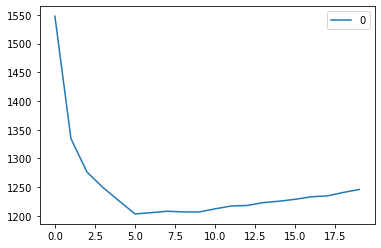

In [41]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [56]:
# Run with Cross Validation: First lets try brute force search on train data that is not normalised
# For KNNR The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 

# Caveat: cross_val_score() reports scores in ascending order (largest score is best). But MSE is naturally descending scores 
# (the smallest score is best). Thus we need to # use ‘neg_mean_squared_error’ to invert the sorting. This also results in the 
# score to be negative even though the value can never be negative.

# descending Mean Squared Error score(smallest score is best) is denoted by negative even though the value is positive

mse_values = []
neighbors = list(np.arange(1,50,1))
for n in neighbors:
    knnR = KNeighborsRegressor(n_neighbors = n, algorithm = 'brute') #brute’ will use a brute-force search.
    cross_val = cross_val_score(knnR,X_train,y_train,cv = 5 , scoring = 'neg_mean_squared_error')
    mse_values.append(cross_val.mean())


print(mse_values)
print(true_MSE)
optimal_n = 7 #neighbors[mse_values.index(max(mse_values))]
knnR_optimal = KNeighborsRegressor(n_neighbors = optimal_n,algorithm = 'brute')
knnR_optimal.fit(X_train, y_train)  #fit the model
y_pred=knnR_optimal.predict(X_test) #make prediction on test set
rmse = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
print("The RMSE for optimal k = {0} using brute is {1}".format(optimal_n,rmse))

# Interestingly, the optimal k differed when run with 5 CV' But the below GridSearchCV suggests optimal_n= 7

[-2468426.6239813925, -1940934.413057068, -1756045.7444524828, -1641355.8064152426, -1620188.788054267, -1574525.9965531663, -1564215.2084882108, -1555175.188683233, -1548922.5936121948, -1556826.6149336097, -1563209.057117428, -1572668.832146729, -1581458.8472785628, -1603552.8538173402, -1625466.8642258106, -1641398.12606354, -1655019.9896741423, -1667750.189816556, -1682759.1733956963, -1694068.1619682827, -1700130.9896470148, -1703206.6496089804, -1713462.0277657472, -1714700.4067510874, -1716016.6930122238, -1716067.1620341535, -1711348.8048799536, -1710618.8335589145, -1713578.8527973287, -1716993.6426448983, -1719745.3773650222, -1717197.8009571887, -1716105.0255096506, -1710803.6399370865, -1707600.0097691468, -1703557.5001405827, -1700423.0484824977, -1702042.881159328, -1702758.4769588318, -1703404.6152640108, -1702204.0106362924, -1697545.9523788337, -1691879.3134277961, -1689185.768412511, -1686090.5557551477, -1681616.3245661897, -1678161.8083465123, -1674337.924150501, -1

In [59]:
#Implementing GridsearchCV 

#For deciding the value of k, plotting the elbow curve every time is be a cumbersome and tedious process. 
#You can simply use gridsearch to find the best value.

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':(np.arange(1,50,1))}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 7}

In [58]:
#Predictions on the test dataset

#reading test and submission files
test = pd.read_csv('C:/Users/ngbyju/Dropbox/1. BNGPersonal/Purdue-SimpliLearn/3. AI & ML/AnalyticsVidhyaContests/Bigmartsales/test.csv')
test.head()
submission = pd.read_csv('C:/Users/ngbyju/Dropbox/1. BNGPersonal/Purdue-SimpliLearn/3. AI & ML/AnalyticsVidhyaContests/Bigmartsales/sample_submission.csv')
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']

#preprocessing test dataset
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
test['Item_Weight'].fillna(mean, inplace =True)
test = pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = model.predict(test)
submission['Item_Outlet_Sales'] = predict
submission.to_csv('C:/Users/ngbyju/Dropbox/1. BNGPersonal/Purdue-SimpliLearn/3. AI & ML/AnalyticsVidhyaContests/Bigmartsales/submit_file.csv',index=False)


# KNn Regression on Housing Dataset
#Source: http://www.andrewgurung.com/2018/12/28/regression-model-evaluation-mean-squared-error/

In [32]:

# import modules
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# read data file from github
# dataframe: houseDf
gitFileURL = 'https://raw.githubusercontent.com/andrewgurung/data-repository/master/housing.csv'
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
houseDf = pd.read_csv(gitFileURL, delim_whitespace=True, names = cols)



In [36]:
# convert into numpy array for scikit-learn
houseArr = houseDf.values

# Let's split columns into the usual feature columns(X) and target column(Y)
# Y represents the target 'MEDV' column
X = houseArr[:, 0:13]
Y = houseArr[:, 13]

# set k-fold count
folds = 10

# set seed to reproduce the same random data each time
seed = 7

# split data using KFold
kfold = KFold(n_splits=folds, shuffle = True, random_state=seed)

# instantiate a regression model
model = LinearRegression()

# set scoring parameter to 'neg_mean_squared_error'
scoring = 'neg_mean_squared_error'

# call cross_val_score() to run cross validation
resultArr = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# calculate mean of scores for all folds
mse = resultArr.mean()
#print(resultArr)
print(mse)

# calculate standard deviation
stdAccuracy = resultArr.std()

# display Mean Squared Error
# descending score(smallest score is best) is denoted by negative even though the value is positive
print("Mean squared Error: %.3f, Standard Deviation : %.3f" % (mse, stdAccuracy))


-23.746501811313415
Mean squared Error: -23.747, Standard Deviation : 11.143
